# Kwanza Tukule Data Analyst Assessment

## Introduction

This notebook presents the analysis and insights derived from the anonymized sales dataset provided by Kwanza Tukule. The assessment involves evaluating technical, analytical, and problem-solving skills through various tasks such as data cleaning, exploratory analysis, advanced analysis, and visualization. 

### Objectives:
1. Perform data cleaning and preparation to ensure the dataset is ready for analysis.
2. Conduct exploratory data analysis (EDA) to uncover patterns and trends in sales performance.
3. Perform advanced analyses, including customer segmentation, forecasting, and anomaly detection.
4. Provide strategic insights and actionable recommendations based on the analysis.
5. Develop a dashboard summarizing key findings to aid decision-making.

### Tools and Technologies:
- **Python**: For data cleaning, analysis, and visualizations.
- **Libraries**: Pandas, NumPy, Matplotlib, Seaborn, Plotly, and Scikit-learn.
- **Jupyter Notebook**: For interactive and well-documented analysis.

The following sections will detail the approach and findings for each task outlined in the assessment instructions.


## **Section 1: Data Cleaning and Preparation (20 points)**


In [11]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Load the data
df = pd.read_excel('./Case Study Data - Read Only.xlsx')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Display the number of rows and columns in the dataset
print("\nNumber of Rows and Columns in the Dataset:")
print(df.shape)

# Display the column names in the dataset
print("\nColumn Names in the Dataset:")
print(df.columns)

# Check for basic information and data types
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Dataset Preview:
                 DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0 2024-08-18 21:32:00        Category-106       Product-21f4   
1 2024-08-18 21:32:00        Category-120       Product-4156   
2 2024-08-18 21:32:00        Category-121       Product-49bd   
3 2024-08-18 21:32:00         Category-76       Product-61dd   
4 2024-08-18 21:32:00        Category-119       Product-66e0   

  ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY  UNIT PRICE  
0       Business-de42       Location-1ba8         1       850.0  
1       Business-de42       Location-1ba8         2      1910.0  
2       Business-de42       Location-1ba8         1      3670.0  
3       Business-de42       Location-1ba8         1      2605.0  
4       Business-de42       Location-1ba8         5      1480.0  

Number of Rows and Columns in the Dataset:
(333405, 7)

Column Names in the Dataset:
Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QU

From the inspection:
1. Missing Values are found in the UNIT PRICE column having 8 missing values.
2. There are 3,524 duplicate rows in the dataset.


In [2]:

print(df['UNIT PRICE'].describe())

count    333397.000000
mean       2322.039538
std        1585.256624
min           0.000000
25%        1420.000000
50%        1840.000000
75%        2755.000000
max       16136.000000
Name: UNIT PRICE, dtype: float64


Since the missing values account for only 8 rows out of 333,405 (0.0024%), filling them with the mean is a more reasonable approach. This ensures continuity in the column for analysis. Additionally, given the size of the dataset, the mean serves as a reliable central value without significantly affecting the overall distribution.

For the duplicate rows, we will proceed to drop them to ensure data quality and avoid redundancy.



In [3]:
# Remove duplicate rows
df = df.drop_duplicates()
print(f"Duplicates removed. Remaining rows: {df.shape[0]}")

# Handle missing values in 'UNIT PRICE'
# Option 1: Replace missing values with the mean of the column
mean_unit_price = df['UNIT PRICE'].mean()
df['UNIT PRICE'] = df['UNIT PRICE'].fillna(mean_unit_price)

# Option 2: Drop rows with missing values (uncomment if preferred)
# df = df.dropna(subset=['UNIT PRICE'])

print(f"Missing values in 'UNIT PRICE' handled. Remaining missing values: {df['UNIT PRICE'].isnull().sum()}")

Duplicates removed. Remaining rows: 329881
Missing values in 'UNIT PRICE' handled. Remaining missing values: 0


### Data Quality Assessment

1. **Missing Values**:  
   - The **'UNIT PRICE'** column had 8 missing values.
   - **Action Taken**: These missing values were filled with the **mean** of the column, as the dataset is large and the mean is a reliable central value.

2. **Duplicate Rows**:  
   - There were **3,524 duplicate rows** in the dataset.
   - **Action Taken**: The duplicate rows were removed, reducing the dataset to **329,881 rows**.

3. **Remaining Issues**:  
   - After handling the missing values and removing duplicates, there are **no remaining missing values** in the dataset.


Feature Engineering: Create the following columns: “Month-Year” (e.g., August 2024) from the “DATE” column.

In [4]:
# Create a 'Month-Year' column
df['Month-Year'] = df['DATE'].dt.strftime('%B %Y')

# Display the first few rows to verify
print("\nDataset with 'Month-Year' column added:")
print(df[['DATE', 'Month-Year']].head())



Dataset with 'Month-Year' column added:
                 DATE   Month-Year
0 2024-08-18 21:32:00  August 2024
1 2024-08-18 21:32:00  August 2024
2 2024-08-18 21:32:00  August 2024
3 2024-08-18 21:32:00  August 2024
4 2024-08-18 21:32:00  August 2024


In [5]:
df.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,August 2024
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,August 2024
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,August 2024
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,August 2024
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,August 2024


In [6]:
# Filtering for another month, the month of September 2024, for example
df_september = df[df['Month-Year'] == 'September 2024']

# Display the first few rows of September 2024
print(df_september.head())

                  DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
17 2024-09-06 08:42:00         Category-75       Product-6aa1   
18 2024-09-06 08:42:00         Category-76       Product-c570   
19 2024-09-06 08:42:00        Category-100       Product-f3ee   
21 2024-09-05 19:48:00        Category-120       Product-14f3   
22 2024-09-05 19:48:00        Category-120       Product-9a3e   

   ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY  UNIT PRICE  \
17       Business-f13b       Location-bb69         1      2255.0   
18       Business-f13b       Location-bb69         1      2540.0   
19       Business-f13b       Location-bb69         1      1880.0   
21       Business-5d3e       Location-1979         5      1740.0   
22       Business-5d3e       Location-1979         5      1695.0   

        Month-Year  
17  September 2024  
18  September 2024  
19  September 2024  
21  September 2024  
22  September 2024  


## **Section 2: Exploratory Data Analysis (30 points)**

### 1. **Sales Overview:**

We'll calculate the total **Quantity** and **Value** (Quantity × Unit Price) grouped by:
- **Anonymized Category**
- **Anonymized Business**

In [7]:
df.columns

Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QUANTITY', 'UNIT PRICE',
       'Month-Year'],
      dtype='object')

In [8]:
# Calculate the total Quantity and Value grouped by Anonymized Category
df['VALUE'] = df['QUANTITY'] * df['UNIT PRICE']  # Calculate Value

category_sales = df.groupby('ANONYMIZED CATEGORY')[['QUANTITY', 'VALUE']].sum().reset_index()

# Calculate the total Quantity and Value grouped by Anonymized Business
business_sales = df.groupby('ANONYMIZED BUSINESS')[['QUANTITY', 'VALUE']].sum().reset_index()

# Display the top 5 categories and businesses
print("Sales by Anonymized Category:")
print(category_sales.head())

print("\nSales by Anonymized Business:")
print(business_sales.head())


Sales by Anonymized Category:
  ANONYMIZED CATEGORY  QUANTITY         VALUE
0        Category-100     76824  1.349028e+08
1        Category-101     19585  3.562652e+07
2        Category-102      1786  4.644630e+05
3        Category-104      1217  1.557598e+06
4        Category-105      1579  2.690719e+06

Sales by Anonymized Business:
  ANONYMIZED BUSINESS  QUANTITY     VALUE
0       Business-0000         8   10445.0
1       Business-0005         1    2645.0
2       Business-0029        26   77340.0
3       Business-003d        98  221761.0
4       Business-0072       127  225056.0


In [9]:
category_sales['ANONYMIZED CATEGORY'].unique()

array(['Category-100', 'Category-101', 'Category-102', 'Category-104',
       'Category-105', 'Category-106', 'Category-107', 'Category-108',
       'Category-109', 'Category-110', 'Category-111', 'Category-113',
       'Category-114', 'Category-115', 'Category-116', 'Category-117',
       'Category-118', 'Category-119', 'Category-120', 'Category-121',
       'Category-122', 'Category-123', 'Category-124', 'Category-125',
       'Category-74', 'Category-75', 'Category-76', 'Category-77',
       'Category-78', 'Category-79', 'Category-81', 'Category-82',
       'Category-83', 'Category-84', 'Category-85', 'Category-86',
       'Category-89', 'Category-90', 'Category-91', 'Category-92',
       'Category-94', 'Category-95', 'Category-96', 'Category-97',
       'Category-98', 'Category-99'], dtype=object)

In [10]:
business_sales['ANONYMIZED BUSINESS'].unique()

array(['Business-0000', 'Business-0005', 'Business-0029', ...,
       'Business-ffb1', 'Business-ffd2', 'Business-ffff'], dtype=object)

Visualizations (e.g., bar charts or tables) to support the findings.

In [12]:
print(df.isnull().sum())

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
Month-Year             0
VALUE                  0
dtype: int64


In [15]:
df.columns

Index(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QUANTITY', 'UNIT PRICE',
       'Month-Year', 'VALUE'],
      dtype='object')

In [19]:
business_sales.head()

,ANONYMIZED BUSINESS,QUANTITY,VALUE
0,Business-0000,8,10445.0
1,Business-0005,1,2645.0
2,Business-0029,26,77340.0
3,Business-003d,98,221761.0
4,Business-0072,127,225056.0


In [20]:
category_sales.head()

,ANONYMIZED CATEGORY,QUANTITY,VALUE
0,Category-100,76824,1.349028e+08
1,Category-101,19585,3.562652e+07
2,Category-102,1786,4.644630e+05
3,Category-104,1217,1.557598e+06
4,Category-105,1579,2.690719e+06


Display top 10 categories/businesses by value and quantity

C:\Users\HomePC\AppData\Local\Temp\ipykernel_27660\529846033.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


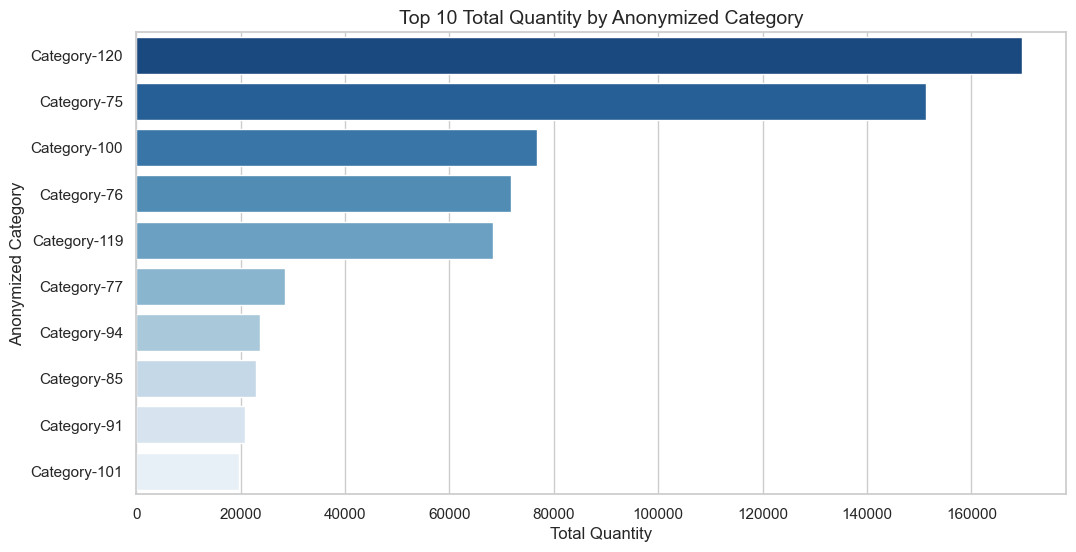

C:\Users\HomePC\AppData\Local\Temp\ipykernel_27660\529846033.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


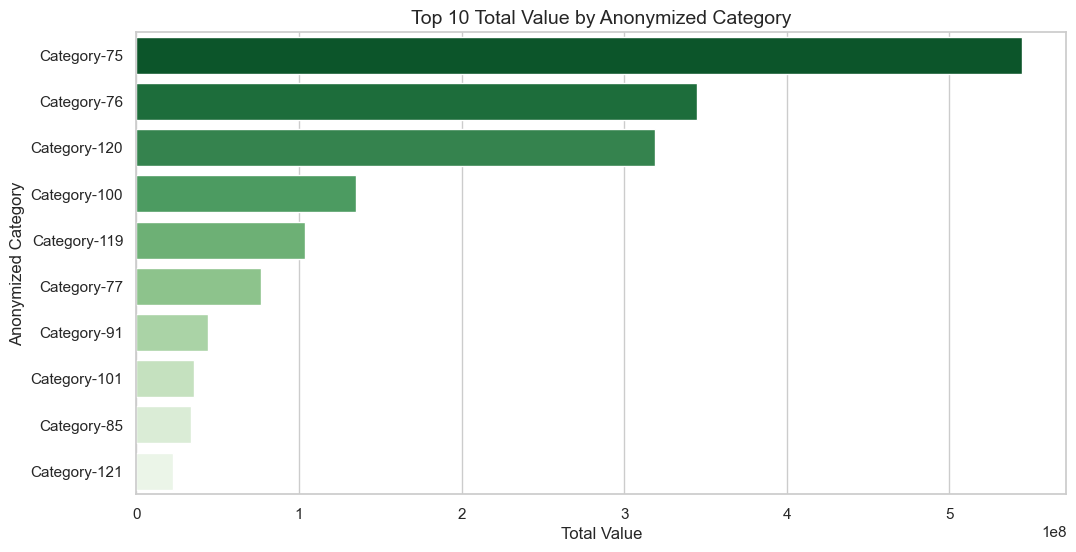

C:\Users\HomePC\AppData\Local\Temp\ipykernel_27660\529846033.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


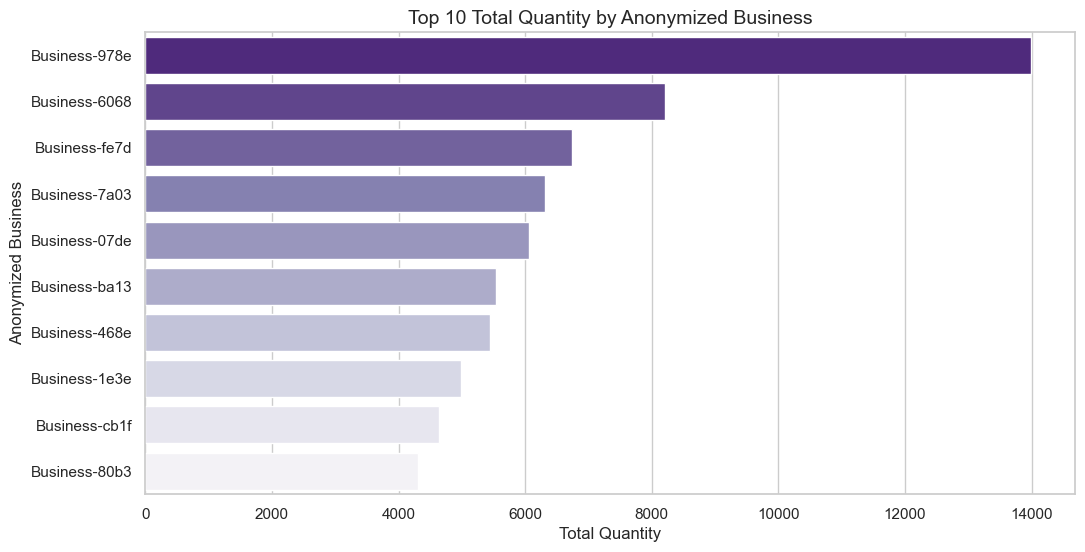

C:\Users\HomePC\AppData\Local\Temp\ipykernel_27660\529846033.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


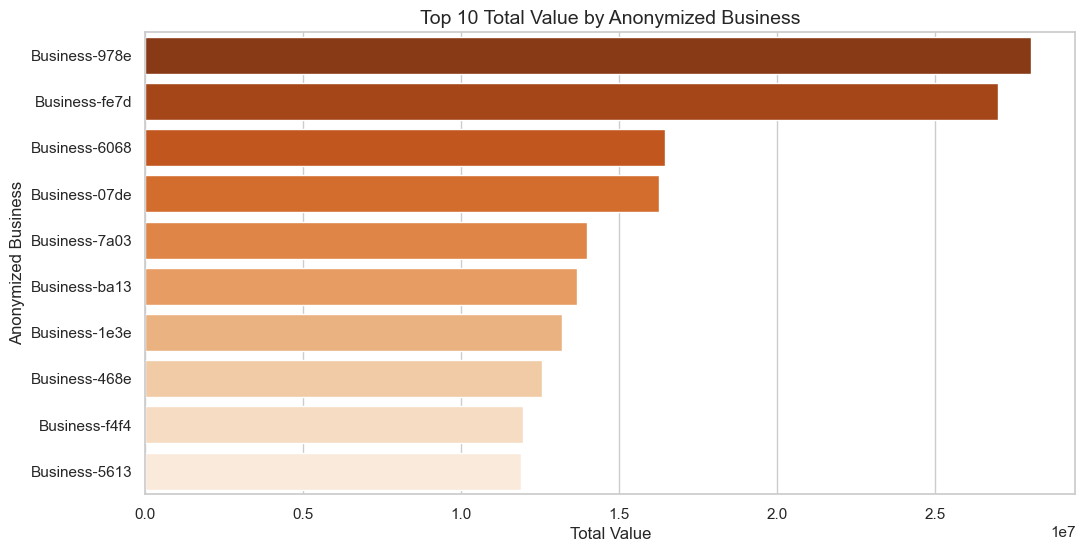

In [25]:
# Set a style for the plots
sns.set_theme(style="whitegrid")

# Define the number of top categories/businesses to display
top_n = 10

# Filter for top categories by Quantity and Value
top_categories_quantity = category_sales.nlargest(top_n, 'QUANTITY')
top_categories_value = category_sales.nlargest(top_n, 'VALUE')

# Bar chart for Top N Total Quantity by Anonymized Category
plt.figure(figsize=(12, 6))
sns.barplot(
    x='QUANTITY', 
    y='ANONYMIZED CATEGORY', 
    data=top_categories_quantity.sort_values('QUANTITY', ascending=False), 
    palette='Blues_r'
)
plt.title(f'Top {top_n} Total Quantity by Anonymized Category', fontsize=14)
plt.xlabel('Total Quantity')
plt.ylabel('Anonymized Category')
plt.show()

# Bar chart for Top N Total Value by Anonymized Category
plt.figure(figsize=(12, 6))
sns.barplot(
    x='VALUE', 
    y='ANONYMIZED CATEGORY', 
    data=top_categories_value.sort_values('VALUE', ascending=False), 
    palette='Greens_r'
)
plt.title(f'Top {top_n} Total Value by Anonymized Category', fontsize=14)
plt.xlabel('Total Value')
plt.ylabel('Anonymized Category')
plt.show()

# Filter for top businesses by Quantity and Value
top_businesses_quantity = business_sales.nlargest(top_n, 'QUANTITY')
top_businesses_value = business_sales.nlargest(top_n, 'VALUE')

# Bar chart for Top N Total Quantity by Anonymized Business
plt.figure(figsize=(12, 6))
sns.barplot(
    x='QUANTITY', 
    y='ANONYMIZED BUSINESS', 
    data=top_businesses_quantity.sort_values('QUANTITY', ascending=False), 
    palette='Purples_r'
)
plt.title(f'Top {top_n} Total Quantity by Anonymized Business', fontsize=14)
plt.xlabel('Total Quantity')
plt.ylabel('Anonymized Business')
plt.show()

# Bar chart for Top N Total Value by Anonymized Business
plt.figure(figsize=(12, 6))
sns.barplot(
    x='VALUE', 
    y='ANONYMIZED BUSINESS', 
    data=top_businesses_value.sort_values('VALUE', ascending=False), 
    palette='Oranges_r'
)
plt.title(f'Top {top_n} Total Value by Anonymized Business', fontsize=14)
plt.xlabel('Total Value')
plt.ylabel('Anonymized Business')
plt.show()


Display bottom 10 categories/businesses by value and quantity

C:\Users\HomePC\AppData\Local\Temp\ipykernel_27660\1212560358.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


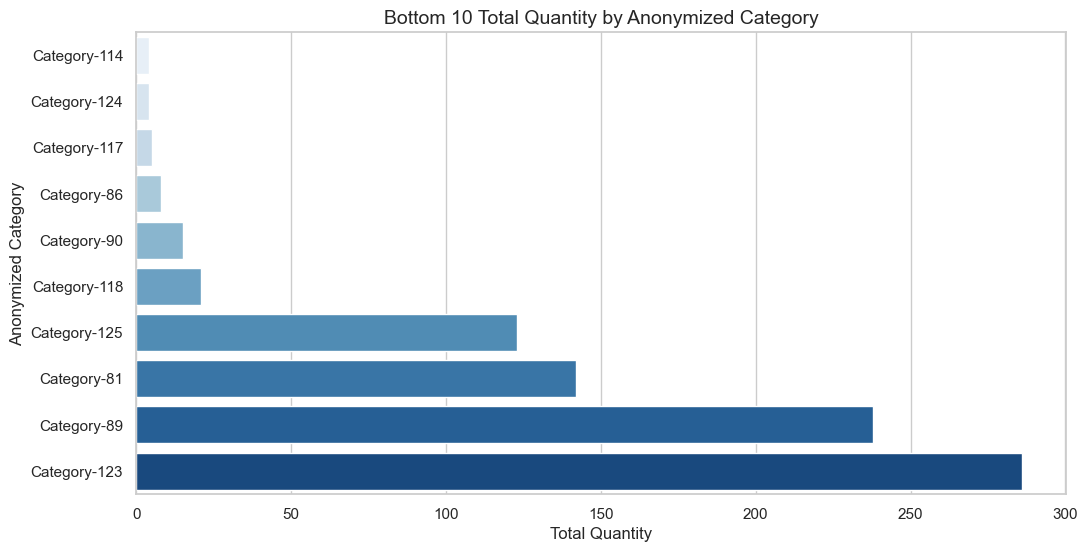

C:\Users\HomePC\AppData\Local\Temp\ipykernel_27660\1212560358.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


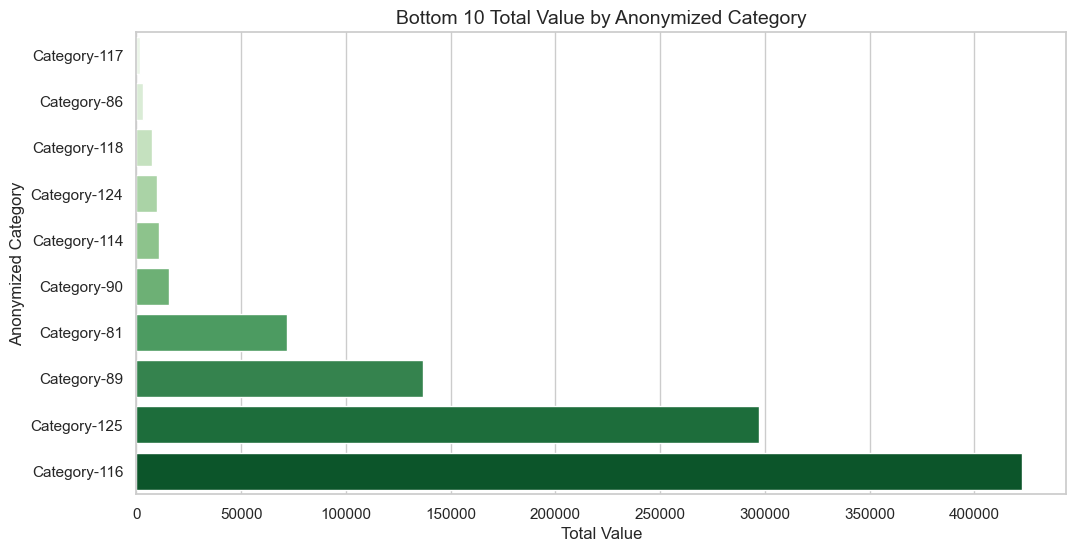

C:\Users\HomePC\AppData\Local\Temp\ipykernel_27660\1212560358.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


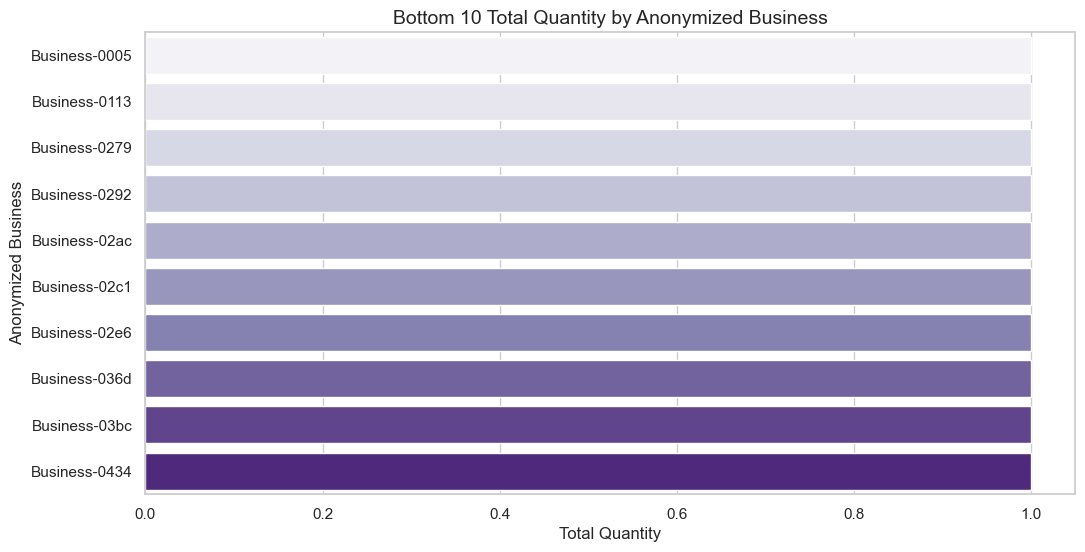

C:\Users\HomePC\AppData\Local\Temp\ipykernel_27660\1212560358.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


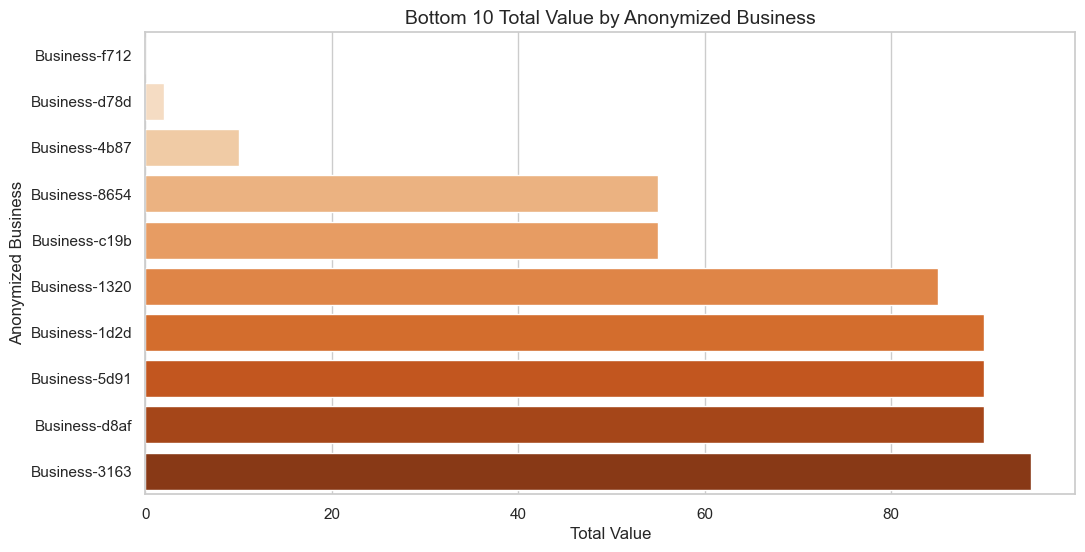

In [26]:
# Define the number of bottom categories/businesses to display
bottom_n = 10

# Filter for bottom categories by Quantity and Value
bottom_categories_quantity = category_sales.nsmallest(bottom_n, 'QUANTITY')
bottom_categories_value = category_sales.nsmallest(bottom_n, 'VALUE')

# Bar chart for Bottom N Total Quantity by Anonymized Category
plt.figure(figsize=(12, 6))
sns.barplot(
    x='QUANTITY', 
    y='ANONYMIZED CATEGORY', 
    data=bottom_categories_quantity.sort_values('QUANTITY', ascending=True), 
    palette='Blues'
)
plt.title(f'Bottom {bottom_n} Total Quantity by Anonymized Category', fontsize=14)
plt.xlabel('Total Quantity')
plt.ylabel('Anonymized Category')
plt.show()

# Bar chart for Bottom N Total Value by Anonymized Category
plt.figure(figsize=(12, 6))
sns.barplot(
    x='VALUE', 
    y='ANONYMIZED CATEGORY', 
    data=bottom_categories_value.sort_values('VALUE', ascending=True), 
    palette='Greens'
)
plt.title(f'Bottom {bottom_n} Total Value by Anonymized Category', fontsize=14)
plt.xlabel('Total Value')
plt.ylabel('Anonymized Category')
plt.show()

# Filter for bottom businesses by Quantity and Value
bottom_businesses_quantity = business_sales.nsmallest(bottom_n, 'QUANTITY')
bottom_businesses_value = business_sales.nsmallest(bottom_n, 'VALUE')

# Bar chart for Bottom N Total Quantity by Anonymized Business
plt.figure(figsize=(12, 6))
sns.barplot(
    x='QUANTITY', 
    y='ANONYMIZED BUSINESS', 
    data=bottom_businesses_quantity.sort_values('QUANTITY', ascending=True), 
    palette='Purples'
)
plt.title(f'Bottom {bottom_n} Total Quantity by Anonymized Business', fontsize=14)
plt.xlabel('Total Quantity')
plt.ylabel('Anonymized Business')
plt.show()

# Bar chart for Bottom N Total Value by Anonymized Business
plt.figure(figsize=(12, 6))
sns.barplot(
    x='VALUE', 
    y='ANONYMIZED BUSINESS', 
    data=bottom_businesses_value.sort_values('VALUE', ascending=True), 
    palette='Oranges'
)
plt.title(f'Bottom {bottom_n} Total Value by Anonymized Business', fontsize=14)
plt.xlabel('Total Value')
plt.ylabel('Anonymized Business')
plt.show()
